In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
student_math = pd.read_csv('C:/Users/rl893/Documents/personal info/priya_assgn/task1/student-math.csv',sep = ';',quotechar = '"')

In [65]:
student_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [66]:
#student_math.info()

In [69]:
student_math["final_grade"] = student_math.apply(lambda x: x.G1 + x.G2 + x.G3, axis=1)

In [70]:
student_math[["G1","G2","G3","final_grade"]].head()

,G1,G2,G3,final_grade
0,5,6,6,17
1,5,5,6,16
2,7,8,10,25
3,15,14,15,44
4,6,10,10,26


In [71]:
for i in ["G1","G2","G3"]:
    del student_math[i]

In [72]:
student_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school         395 non-null object
sex            395 non-null object
age            395 non-null int64
address        395 non-null object
famsize        395 non-null object
Pstatus        395 non-null object
Medu           395 non-null int64
Fedu           395 non-null int64
Mjob           395 non-null object
Fjob           395 non-null object
reason         395 non-null object
guardian       395 non-null object
traveltime     395 non-null int64
studytime      395 non-null int64
failures       395 non-null int64
schoolsup      395 non-null object
famsup         395 non-null object
paid           395 non-null object
activities     395 non-null object
nursery        395 non-null object
higher         395 non-null object
internet       395 non-null object
romantic       395 non-null object
famrel         395 non-null int64
freetime       395 non-null int64
goout          395 non-null 

In [73]:
student_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,44
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,26


In [74]:
bool_cols = [col for col in student_math if student_math[col].dropna().value_counts().index.isin(['yes','no']).all()]

In [75]:
bool_cols

['schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [59]:
for col in bool_cols:
    student_math[col] = student_math[col].map({'yes': 1, 'no': 0})    

In [76]:
student_math['school'] = student_math['school'].map({"GP": 1, "MS": 0}) 

In [77]:
student_math['sex'] = student_math['sex'].map({"F": 1, "M": 0}) 
student_math['address'] = student_math['address'].map({"U": 1, "R": 0}) 
student_math['famsize'] = student_math['famsize'].map({"LE3": 1, "GT3": 0}) 
student_math['Pstatus'] = student_math['Pstatus'].map({"T": 1, "A": 0}) 


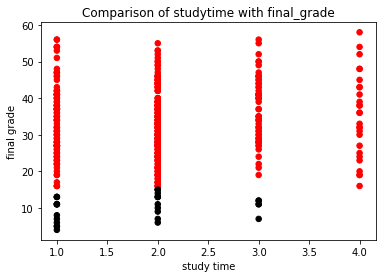

In [78]:

#creating scatter plot of studytime and final grade
colors = np.where(student_math.final_grade > 15, 'r', 'k')
plt.scatter(student_math.studytime, student_math.final_grade, s=30, c= colors)
plt.title("Comparison of studytime with final_grade")
plt.xlabel("study time")
plt.ylabel("final grade")
plt.show()


In [ ]:
#Observation from scatter plot
#1.final grade is above 15 for all the students who spend more than 10 hours in studying.
#2.very few students who spend 5 to 10 hours secure <15 but most of them aquire grade above 15.


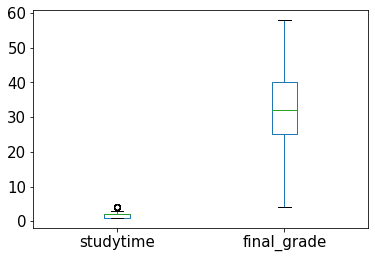

In [85]:
#creating boxplot for final_grade and studytime
boxplot = student_math.boxplot(column=['studytime','final_grade'],grid=False, fontsize=15)


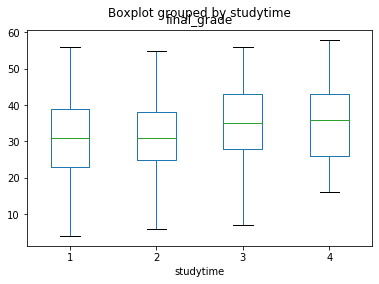

In [84]:
#creating boxplot to compare final_grade of the students based on studytime
student_math.boxplot(column='final_grade', by='studytime' ,grid=False)


In [ ]:
#Observation from the box plot
#Average grade of the students who spend more than 5 hours is higher then the students who spend less

